# Regression


In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [116]:
def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [117]:
df = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 4/HW/advertising.csv')

## EDA

In [118]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [120]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [121]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [122]:
df.corr().Sales.sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

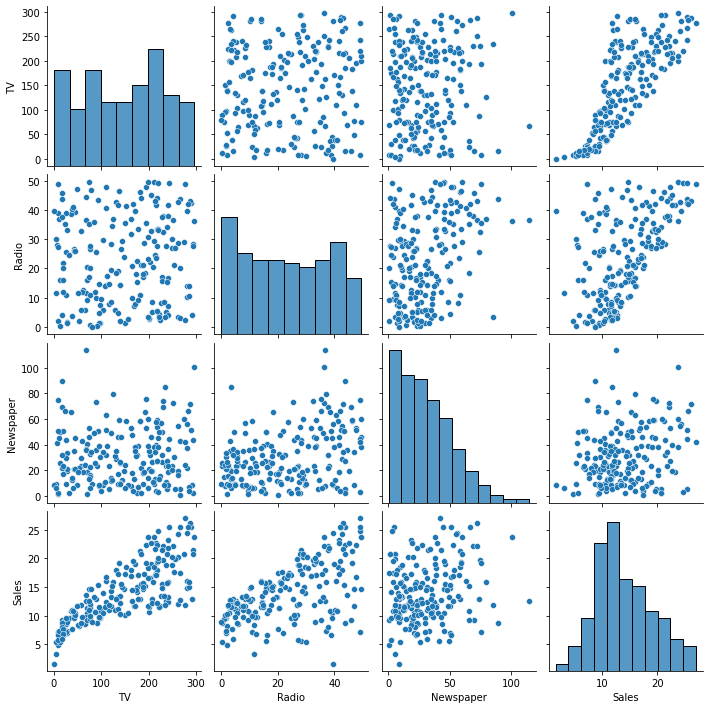

In [123]:
sns.pairplot(data=df);

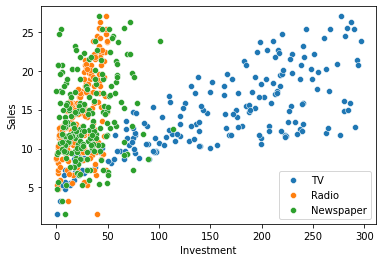

In [124]:
sns.scatterplot(data=df, x='TV', y='Sales')
sns.scatterplot(data=df, x='Radio', y='Sales')
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.xlabel('Investment')
plt.legend(['TV', 'Radio', 'Newspaper'])

## Prediction

In [125]:
algo_test(df.drop(columns='Sales'), df.Sales)

[12:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,R_Squared,RMSE,MAE
Gradient Boosting,0.983662,0.718109,0.614782
XGBRegressor,0.981966,0.754458,0.623961
Decision Tree,0.941459,1.359320,1.022500
KNeighborsRegressor,0.910620,1.679625,1.189000
Extra Tree,0.909381,1.691227,1.327500
Lasso,0.900401,1.773046,1.452202
ElasticNet,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
Linear,0.899438,1.781600,1.460757


In [134]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='Sales'), df.Sales, test_size=.2 ,random_state=25)
reg_model = Lasso()
reg_model.fit(x_train, y_train)
y_pred = reg_model.predict(x_test) 

In [135]:
print("Sabit değer: %.4f" % reg_model.intercept_)
print(x_train.columns)
print("Katsayılar: " + str(np.around(reg_model.coef_, 4)))

Sabit değer: 3.2295
Index(['TV', 'Radio', 'Newspaper'], dtype='object')
Katsayılar: [ 0.0459  0.1787 -0.0015]


Sales=3.2295 + TV×0.0459 + Radio×0.1787 + Newspaper×-0.0015

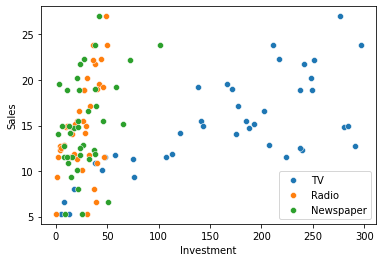

In [136]:
x_test['Sales'] = y_test
x_test['Predictions'] = y_pred
sns.scatterplot(data=x_test, x='TV', y='Sales')
sns.scatterplot(data=x_test, x='Radio', y='Sales')
sns.scatterplot(data=x_test, x='Newspaper', y='Sales')
plt.xlabel('Investment')
plt.legend(['TV', 'Radio', 'Newspaper'])

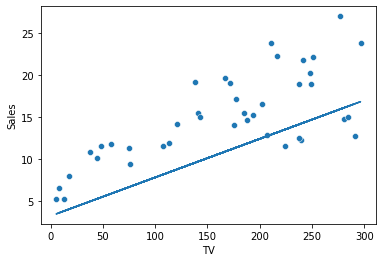

In [141]:
plt.plot(x_test.TV, 3.2295 + 0.0459*x_test.TV)
sns.scatterplot(data=x_test, x=x_test.TV, y=x_test.Sales)

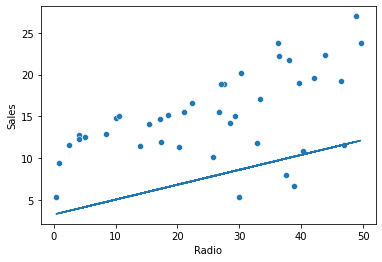

In [142]:
plt.plot(x_test.Radio, 3.2295 + 0.1787*x_test.Radio)
sns.scatterplot(data=x_test, x=x_test.Radio, y=x_test.Sales)

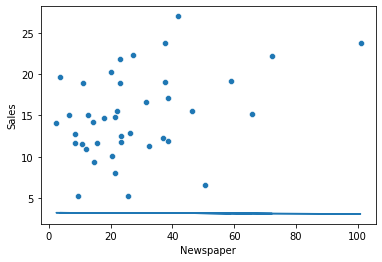

In [143]:
plt.plot(x_test.Newspaper, 3.2295 - 0.0015*x_test.Newspaper)
sns.scatterplot(data=x_test, x=x_test.Newspaper, y=x_test.Sales)

**Sonuc: TV en iyisi**